In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

In [2]:
data_location='../input/used-car-dataset-ford-and-mercedes/bmw.csv'
row_data = pd.read_csv(data_location)
row_data.shape

(10781, 9)

In [3]:
row_data.describe

<bound method NDFrame.describe of            model  year  price transmission  mileage fuelType  tax   mpg  \
0       5 Series  2014  11200    Automatic    67068   Diesel  125  57.6   
1       6 Series  2018  27000    Automatic    14827   Petrol  145  42.8   
2       5 Series  2016  16000    Automatic    62794   Diesel  160  51.4   
3       1 Series  2017  12750    Automatic    26676   Diesel  145  72.4   
4       7 Series  2014  14500    Automatic    39554   Diesel  160  50.4   
...          ...   ...    ...          ...      ...      ...  ...   ...   
10776         X3  2016  19000    Automatic    40818   Diesel  150  54.3   
10777   5 Series  2016  14600    Automatic    42947   Diesel  125  60.1   
10778   3 Series  2017  13100       Manual    25468   Petrol  200  42.8   
10779   1 Series  2014   9930    Automatic    45000   Diesel   30  64.2   
10780         X1  2017  15981    Automatic    59432   Diesel  125  57.6   

       engineSize  
0             2.0  
1             2.0  
2    

In [4]:
data = row_data.dropna(axis=0)
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


In [5]:
print (row_data.dtypes)

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object


In [6]:
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
x = data[features]
y = data['price']
x.shape, y.shape

((10781, 5), (10781,))

In [7]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 70)

In [8]:
test_y.shape

(2696,)

In [9]:
from sklearn.neighbors import KNeighborsRegressor as KNN_Reg
from sklearn.metrics import mean_squared_error as mse

model = KNN_Reg(n_neighbors = 80)

# training the model:
model.fit(train_x, train_y)
acc1 = model.score(test_x, test_y)

# test for prediction
test_predict = model.predict(test_x)
score = mse(test_predict, test_y)
print(' MSE: ', score, '\n', 'Accuracy: ', acc1)  

 MSE:  69966561.79717006 
 Accuracy:  0.4782594640746688


In [10]:
def Elbow(K):
  #initiating an empy list
  test_mse =[]

  #train model for every value of K
  for i in K:
    model = KNN_Reg(n_neighbors=i)
    model.fit(train_x, train_y)
    tmp = model.predict(test_x)
    tmp = mse(tmp, test_y)
    test_mse.append(tmp)
  
  return test_mse

Text(0.5, 1.0, 'Elbow Curve for Test')

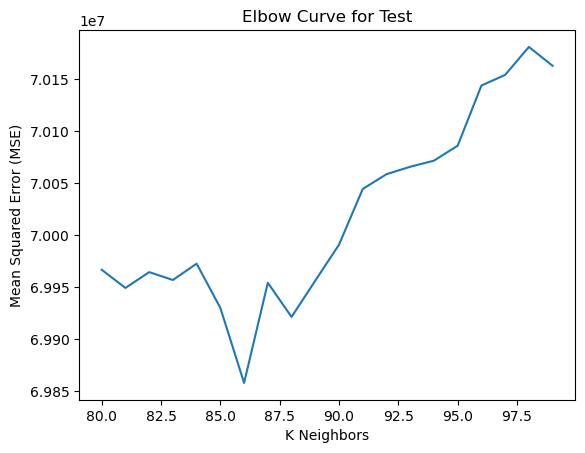

In [11]:
K = range(80, 100)
test = Elbow(K)

#plotting
plt.plot(K,test)
plt.xlabel('K Neighbors')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Curve for Test')

In [12]:
new_model = KNN_Reg(n_neighbors=97)

# Train model
new_model.fit(train_x, train_y)
acc2 = new_model.score(test_x, test_y)

# Prediction test
print(' Accuracy of new model (%):', acc2*100, '\n', 'Accuracy of old model (%):', acc1*100, '\n Improvement (%):', (acc2-acc1)*100)

 Accuracy of new model (%): 47.686221283317856 
 Accuracy of old model (%): 47.82594640746688 
 Improvement (%): -0.13972512414902605


In [13]:
data_mobil_bekas = np.array([[2019,5000,145,30.2,2]])
prediction_old = model.predict(data_mobil_bekas)
prediction_new = new_model.predict(data_mobil_bekas)
print(' Hasil Prediksi harga rumah dengan old model: £', prediction_old, 'atau jika dirupiahkan yaitu: Rp', prediction_old * 19110*1e-6, 'Juta\n',
      'Hasil Prediksi harga rumah dengan new model: £', prediction_new, 'atau jika dirupiahkan yaitu: Rp', prediction_new * 19110*1e-6, 'Juta')

 Hasil Prediksi harga rumah dengan old model: £ [31413.9375] atau jika dirupiahkan yaitu: Rp [600.32034562] Juta
 Hasil Prediksi harga rumah dengan new model: £ [31754.82474227] atau jika dirupiahkan yaitu: Rp [606.83470082] Juta


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [14]:
data_mobil_bekas = np.array([[2019,15000,200,20.4,3]])
prediction_old = model.predict(data_mobil_bekas)
prediction_new = new_model.predict(data_mobil_bekas)
print(' Hasil Prediksi harga rumah dengan old model: £', prediction_old, 'atau jika dirupiahkan yaitu: Rp', prediction_old * 19110*1e-6, 'Juta\n',
      'Hasil Prediksi harga rumah dengan new model: £', prediction_new, 'atau jika dirupiahkan yaitu: Rp', prediction_new * 19110*1e-6, 'Juta')

 Hasil Prediksi harga rumah dengan old model: £ [21903.9875] atau jika dirupiahkan yaitu: Rp [418.58520112] Juta
 Hasil Prediksi harga rumah dengan new model: £ [21511.84536082] atau jika dirupiahkan yaitu: Rp [411.09136485] Juta


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [15]:
data_mobil_bekas = np.array([[2016,30000,150,20,2]])
prediction_old = model.predict(data_mobil_bekas)
prediction_new = new_model.predict(data_mobil_bekas)
print(' Hasil Prediksi harga rumah dengan old model: £', prediction_old, 'atau jika dirupiahkan yaitu: Rp', prediction_old * 19110*1e-6, 'Juta\n',
      'Hasil Prediksi harga rumah dengan new model: £', prediction_new, 'atau jika dirupiahkan yaitu: Rp', prediction_new * 19110*1e-6, 'Juta')

 Hasil Prediksi harga rumah dengan old model: £ [17809.6875] atau jika dirupiahkan yaitu: Rp [340.34312812] Juta
 Hasil Prediksi harga rumah dengan new model: £ [17607.68041237] atau jika dirupiahkan yaitu: Rp [336.48277268] Juta


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
